In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/original_data.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
#drop unwanted columns 
columns_to_drop = ['Work_phone', 'Phone','Email','ID']
df= df.drop(columns=columns_to_drop)
df.head(5)

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
df2 = df.copy()

In [5]:
# Choose a cutoff value and create a list of occupations to be replaced
occupations_to_replace = list(df2['Occupation_type'].value_counts().loc[df2['Occupation_type'].value_counts() < 100].index)

# Replace in dataframe
for cls in occupations_to_replace:
    df2['Occupation_type'] = df2['Occupation_type'].replace(cls,"Other")

# Check to make sure binning was successful
df2['Occupation_type'].value_counts()

Occupation_type
Other                    3275
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Name: count, dtype: int64

In [6]:
df2 = pd.get_dummies(df2, dtype=int)
df2.head()

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,Family_status_Civil marriage,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Occupation_type_Accountants,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,Occupation_type_Core staff,Occupation_type_Drivers,Occupation_type_High skill tech staff,Occupation_type_Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Sales staff,Occupation_type_Security staff
0,1,1,1,0,0,2,15,427500.0,32.868574,12.435574,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,0,2,29,112500.0,58.793815,3.104787,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,4,270000.0,52.321403,8.353354,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,1,0,1,20,283500.0,61.504343,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df2.Target.value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

In [ ]:
# Showing the class imbalance between High/Low Risk Target
df2.pivot_table(index='Target', aggfunc='size').plot(kind='bar')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Unemployed       9709 non-null   int64  
 4   Num_children     9709 non-null   int64  
 5   Num_family       9709 non-null   int64  
 6   Account_length   9709 non-null   int64  
 7   Total_income     9709 non-null   float64
 8   Age              9709 non-null   float64
 9   Years_employed   9709 non-null   float64
 10  Income_type      9709 non-null   object 
 11  Education_type   9709 non-null   object 
 12  Family_status    9709 non-null   object 
 13  Housing_type     9709 non-null   object 
 14  Occupation_type  9709 non-null   object 
 15  Target           9709 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 1.2+ MB


In [9]:
# Create a stratified train/test split. 
# Test set will be 30% of the data.
# Class distribution will be equal for train test and original data
# features
X = df2.drop(["Target",], axis=1) # keep ALL features except for the target

# target
y = df2.Target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

print(X_train.shape)
print(X_test.shape)

(7281, 43)
(2428, 43)


In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [13]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (12638, 43)
After OverSampling, the shape of train_y: (12638,) 

After OverSampling, counts of label '1': 6319
After OverSampling, counts of label '0': 6319


In [15]:
def doClassification(model, X_train, X_test, y_train, y_test):
 
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix: 
    [[6319    0]
 [ 962    0]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      6319
           1       0.00      0.00      0.00       962

    accuracy                           0.87      7281
   macro avg       0.43      0.50      0.46      7281
weighted avg       0.75      0.87      0.81      7281

    



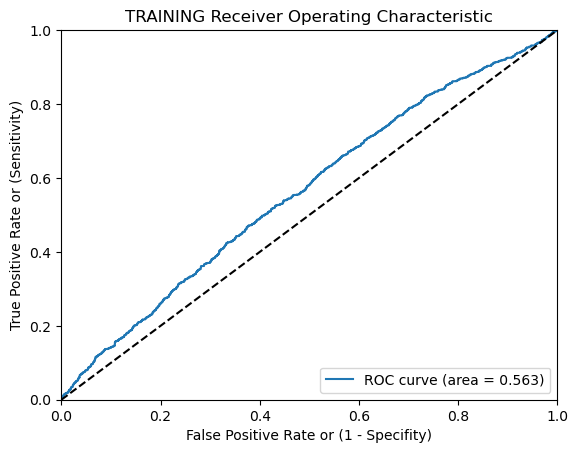



TESTING METRICS

    Test Confusion Matrix: 
    [[2107    0]
 [ 321    0]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      2107
           1       0.00      0.00      0.00       321

    accuracy                           0.87      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.75      0.87      0.81      2428

    



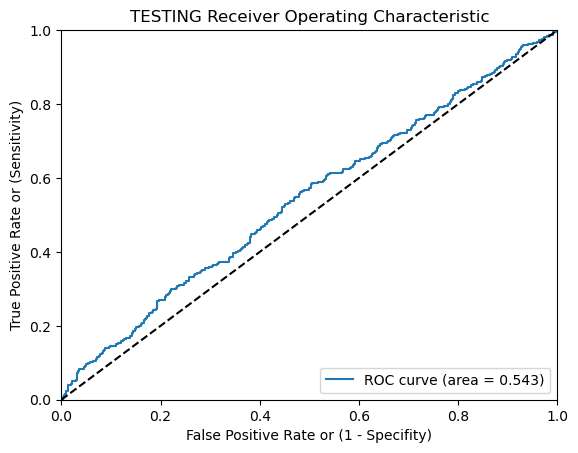

In [17]:
# initialize Logistic Regression
lr = LogisticRegression()

# fit
lr.fit(X_train, y_train)

doClassification(lr, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[4495 1824]
 [2092 4227]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.68      0.71      0.70      6319
           1       0.70      0.67      0.68      6319

    accuracy                           0.69     12638
   macro avg       0.69      0.69      0.69     12638
weighted avg       0.69      0.69      0.69     12638

    



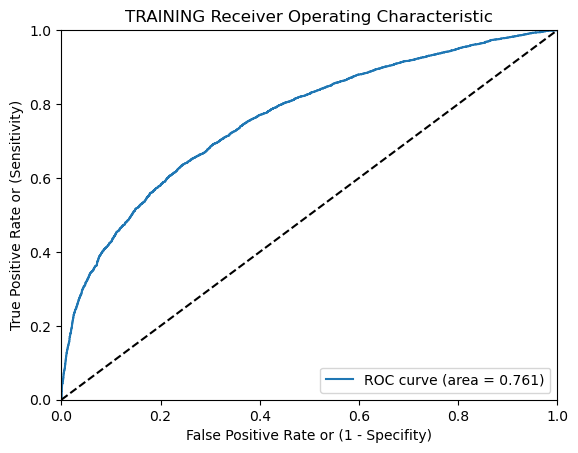



TESTING METRICS

    Test Confusion Matrix: 
    [[1536  571]
 [ 210  111]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.88      0.73      0.80      2107
           1       0.16      0.35      0.22       321

    accuracy                           0.68      2428
   macro avg       0.52      0.54      0.51      2428
weighted avg       0.78      0.68      0.72      2428

    



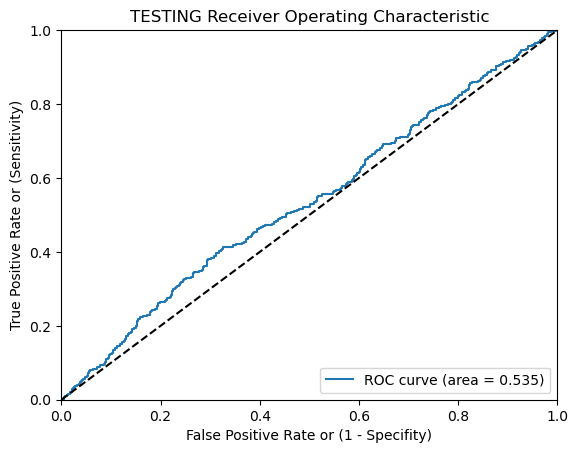

In [16]:
# initialize Logistic Regression SMOTE
lr = LogisticRegression()

# fit
lr.fit(X_train_res, y_train_res)

doClassification(lr, X_train_res, X_test, y_train_res, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[6319    0]
 [   1  961]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6319
           1       1.00      1.00      1.00       962

    accuracy                           1.00      7281
   macro avg       1.00      1.00      1.00      7281
weighted avg       1.00      1.00      1.00      7281

    



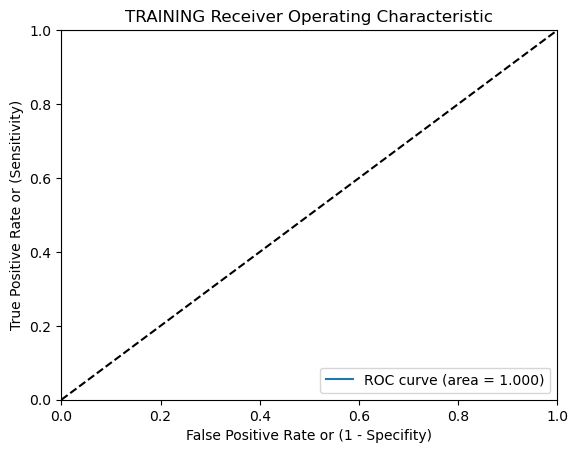



TESTING METRICS

    Test Confusion Matrix: 
    [[2105    2]
 [ 318    3]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      2107
           1       0.60      0.01      0.02       321

    accuracy                           0.87      2428
   macro avg       0.73      0.50      0.47      2428
weighted avg       0.83      0.87      0.81      2428

    



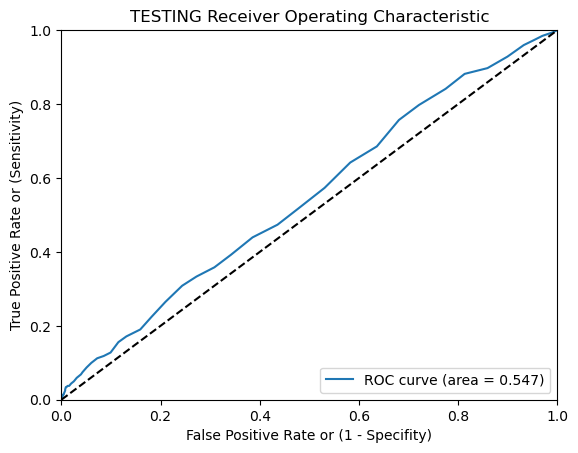

In [19]:
# initialize RandomForest
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train, y_train)

doClassification(rf, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[6319    0]
 [   1 6318]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6319
           1       1.00      1.00      1.00      6319

    accuracy                           1.00     12638
   macro avg       1.00      1.00      1.00     12638
weighted avg       1.00      1.00      1.00     12638

    



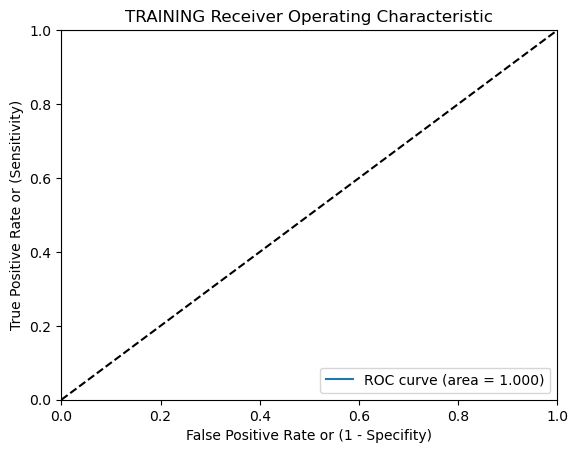



TESTING METRICS

    Test Confusion Matrix: 
    [[2074   33]
 [ 312    9]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      0.98      0.92      2107
           1       0.21      0.03      0.05       321

    accuracy                           0.86      2428
   macro avg       0.54      0.51      0.49      2428
weighted avg       0.78      0.86      0.81      2428

    



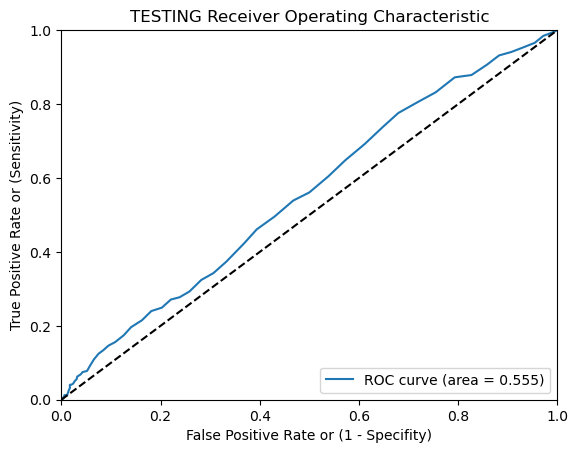

In [21]:
# initialize RandomForest SMOTE
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train_res, y_train_res)

doClassification(rf, X_train_res, X_test, y_train_res, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[6319    0]
 [ 960    2]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      6319
           1       1.00      0.00      0.00       962

    accuracy                           0.87      7281
   macro avg       0.93      0.50      0.47      7281
weighted avg       0.89      0.87      0.81      7281

    



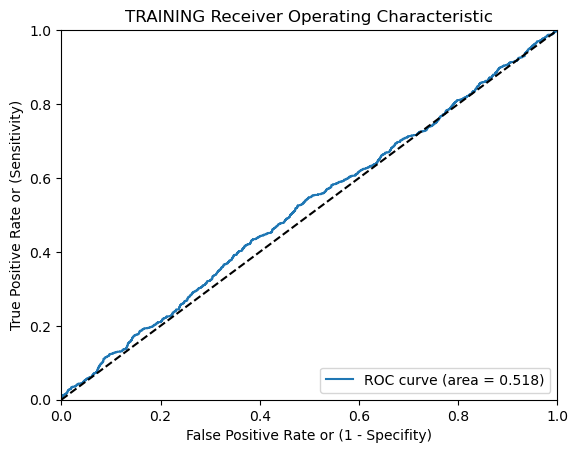



TESTING METRICS

    Test Confusion Matrix: 
    [[2107    0]
 [ 321    0]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      2107
           1       0.00      0.00      0.00       321

    accuracy                           0.87      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.75      0.87      0.81      2428

    



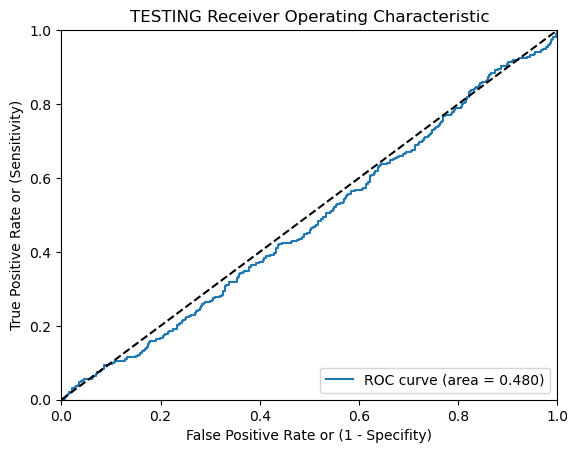

In [22]:
# initialize SVC
sv = SVC(probability=True)

# fit
sv.fit(X_train, y_train)

doClassification(sv, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[2460 3859]
 [2362 3957]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.51      0.39      0.44      6319
           1       0.51      0.63      0.56      6319

    accuracy                           0.51     12638
   macro avg       0.51      0.51      0.50     12638
weighted avg       0.51      0.51      0.50     12638

    



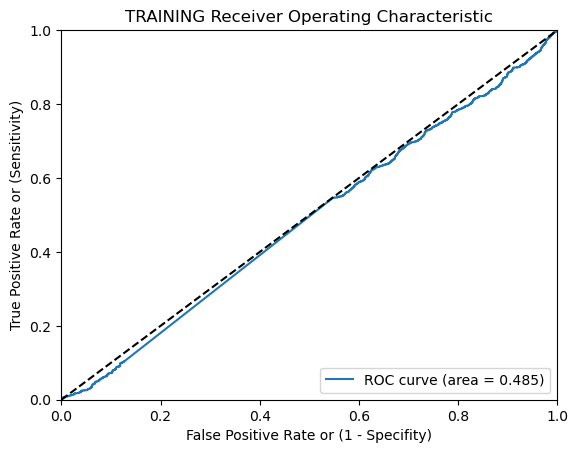



TESTING METRICS

    Test Confusion Matrix: 
    [[ 802 1305]
 [ 106  215]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.88      0.38      0.53      2107
           1       0.14      0.67      0.23       321

    accuracy                           0.42      2428
   macro avg       0.51      0.53      0.38      2428
weighted avg       0.79      0.42      0.49      2428

    



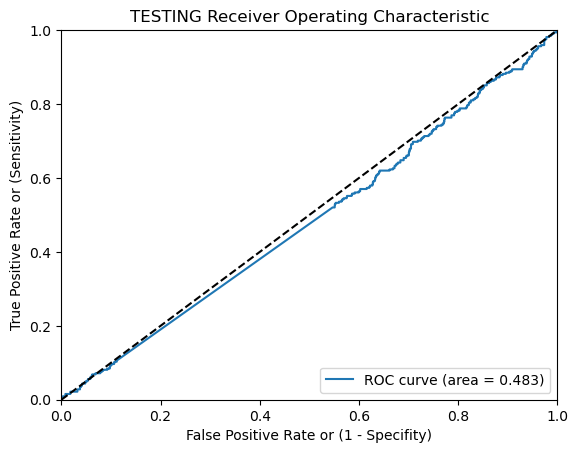

In [24]:
# initialize SVC SMOTE
sv = SVC(probability=True)

# fit
sv.fit(X_train_res, y_train_res)

doClassification(sv, X_train_res, X_test, y_train_res, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[6294   25]
 [ 910   52]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      6319
           1       0.68      0.05      0.10       962

    accuracy                           0.87      7281
   macro avg       0.77      0.53      0.52      7281
weighted avg       0.85      0.87      0.82      7281

    



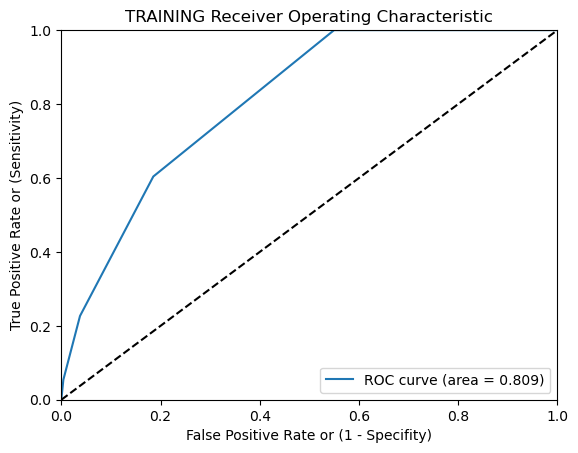



TESTING METRICS

    Test Confusion Matrix: 
    [[2086   21]
 [ 318    3]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      0.99      0.92      2107
           1       0.12      0.01      0.02       321

    accuracy                           0.86      2428
   macro avg       0.50      0.50      0.47      2428
weighted avg       0.77      0.86      0.80      2428

    



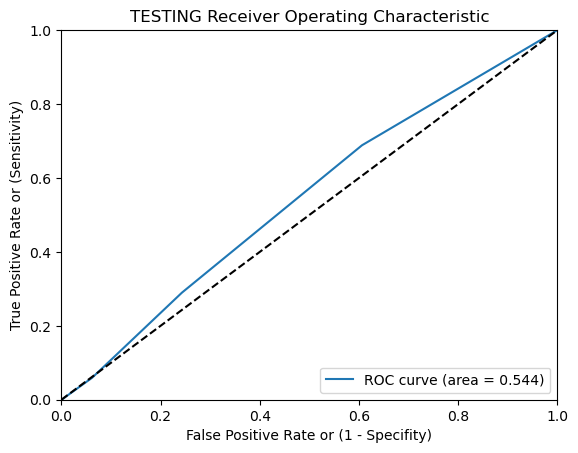

In [25]:
# initialize KNeighbors
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train, y_train)

doClassification(knn, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[4368 1951]
 [ 340 5979]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.93      0.69      0.79      6319
           1       0.75      0.95      0.84      6319

    accuracy                           0.82     12638
   macro avg       0.84      0.82      0.82     12638
weighted avg       0.84      0.82      0.82     12638

    



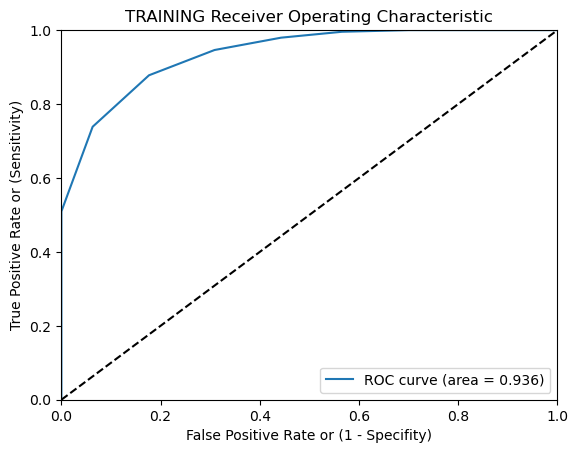



TESTING METRICS

    Test Confusion Matrix: 
    [[1269  838]
 [ 175  146]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.88      0.60      0.71      2107
           1       0.15      0.45      0.22       321

    accuracy                           0.58      2428
   macro avg       0.51      0.53      0.47      2428
weighted avg       0.78      0.58      0.65      2428

    



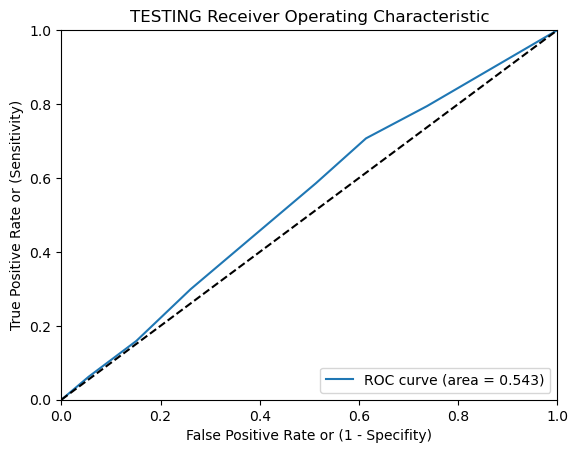

In [26]:
# initialize KNeighbors SMOTE
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train_res, y_train_res)

doClassification(knn, X_train_res, X_test, y_train_res, y_test)

In [34]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

In [35]:
# Train the classifier on the training data
clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [29]:
# Make predictions on the testing data
y_pred = clf.predict(X_test_res)

In [37]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2107
           1       0.15      0.18      0.16       321

    accuracy                           0.76      2428
   macro avg       0.51      0.51      0.51      2428
weighted avg       0.78      0.76      0.77      2428



In [38]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_37 <= 0.50
|   |   |   |--- feature_41 <= 0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |   |--- feature_34 <= 0.50
|   |   |   |   |   |   |   |--- feature_38 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_39 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_39 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_36 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 4.92
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  4.92
|   |   |   |   |   |   |   |   |   

In [39]:
dt_feature_names=list(X.columns)
dt_target_names=[str(s) for s in y.unique()]

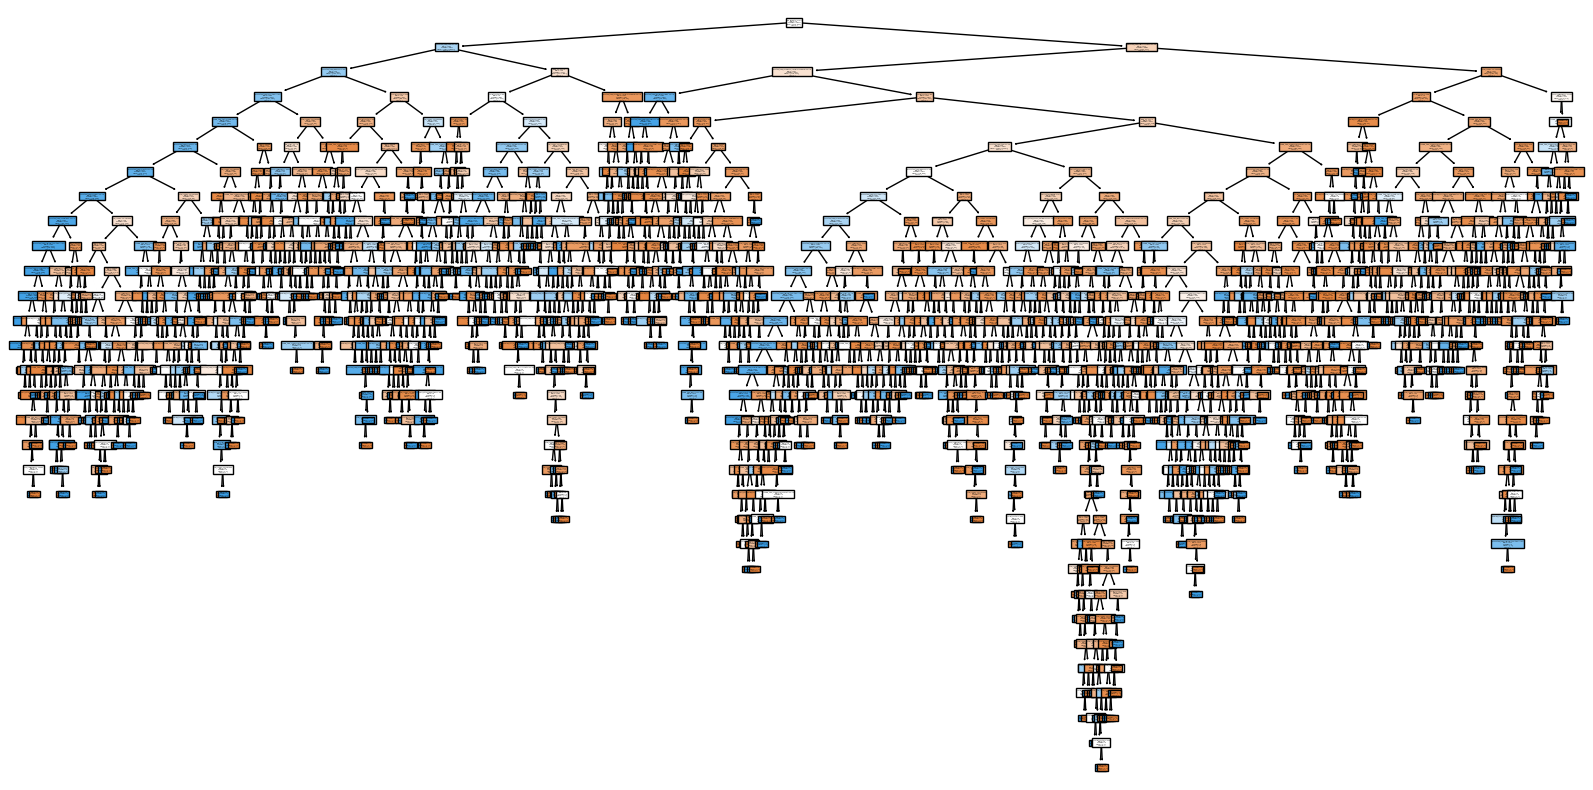

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
plt.show()